In [74]:
import pandas as pd
from pycoingecko import CoinGeckoAPI

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
coingecko = CoinGeckoAPI()

In [56]:
agEur_price = pd.DataFrame(data=coingecko.get_coin_market_chart_by_id(id="ageur", vs_currency="usd", days="max")['prices'], columns=["time", "price_usd"])
time_start = agEur_price.time[0]/1000
time_end = agEur_price.time.iloc[-1]/1000
agEur_price['time'] = pd.to_datetime(agEur_price['time']/1000, unit='s')

eurt_price = pd.DataFrame(data=coingecko.get_coin_market_chart_range_by_id(
    "tether-eurt", "usd", time_start, time_end
)['prices'], columns=["time", "price_usd"])
eurt_price['time'] = pd.to_datetime(eurt_price['time']/1000, unit='s')
eurt_price = eurt_price.where(eurt_price.time > pd.Timestamp('2021-11')).dropna()

ibeur_price = pd.DataFrame(data=coingecko.get_coin_market_chart_range_by_id(
    "iron-bank-euro", "usd", time_start, time_end
)['prices'], columns=["time", "price_usd"])
ibeur_price['time'] = pd.to_datetime(ibeur_price['time']/1000, unit='s')
ibeur_price = ibeur_price.where(ibeur_price.time > pd.Timestamp('2021-11')).dropna()

eurs_price = pd.DataFrame(data=coingecko.get_coin_market_chart_range_by_id(
    "stasis-eurs", "usd", time_start, time_end
)['prices'], columns=["time", "price_usd"])
eurs_price['time'] = pd.to_datetime(eurs_price['time']/1000, unit='s')
eurs_price = eurs_price.where(eurs_price.time > pd.Timestamp('2021-11')).dropna()

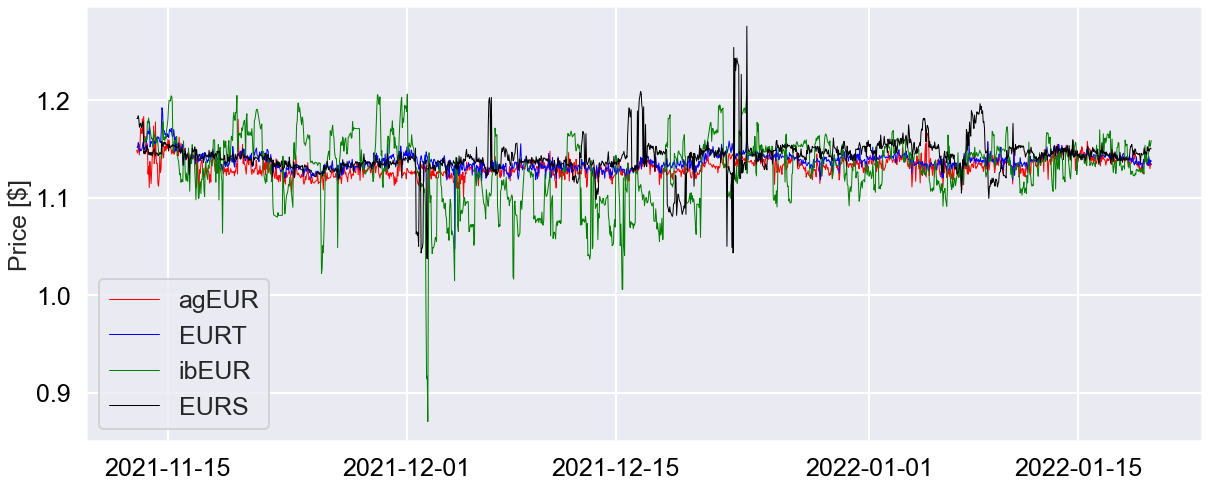

In [77]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

ax.plot(
    agEur_price['time'],
    agEur_price['price_usd'],
    color='red',
    label='agEUR',
    lw=1
)
ax.plot(
    eurt_price['time'],
    eurt_price['price_usd'],
    color='blue',
    label='EURT',
    lw=1
)
ax.plot(
    ibeur_price['time'],
    ibeur_price['price_usd'],
    color='g',
    label='ibEUR',
    lw=1
)
ax.plot(
    eurs_price['time'],
    eurs_price['price_usd'],
    color='k',
    label='EURS',
    lw=1
)

ax.set_ylabel("Price [$]", fontsize=25)
ax.set_xlabel("", fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25, colors='black')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
ax.legend(fontsize=25);

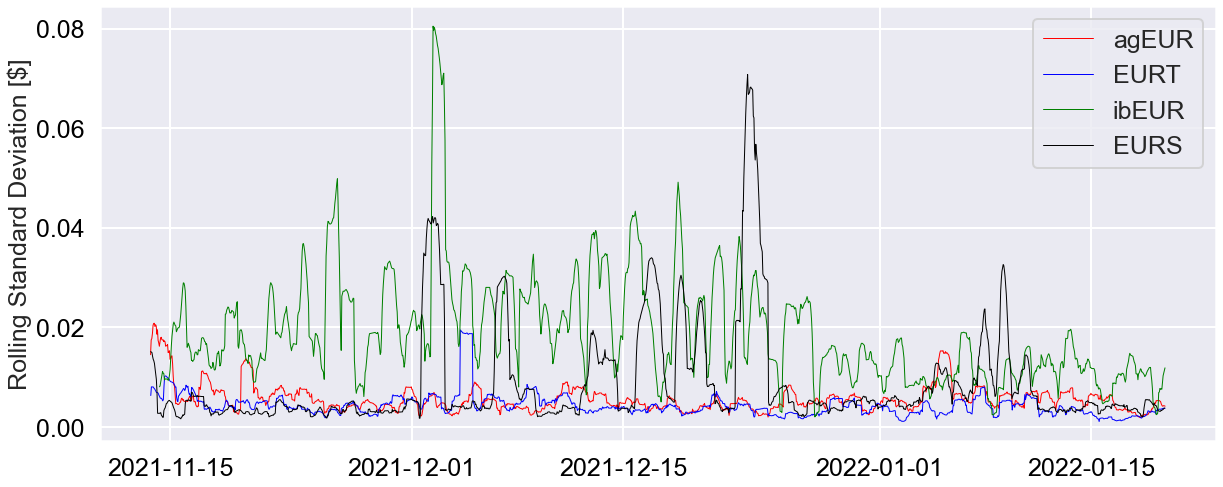

In [76]:
sns.set_context("poster")

fig, ax = plt.subplots(1,1, figsize=(20, 8))

ax.plot(
    agEur_price['time'],
    agEur_price.price_usd.rolling(20).std(ddof=0),
    color='red',
    label='agEUR',
    lw=1
)
ax.plot(
    eurt_price['time'],
    eurt_price.price_usd.rolling(20).std(ddof=0),
    color='blue',
    label='EURT',
    lw=1
)
ax.plot(
    ibeur_price['time'],
    ibeur_price.price_usd.rolling(20).std(ddof=0),
    color='g',
    label='ibEUR',
    lw=1
)
ax.plot(
    eurs_price['time'],
    eurs_price.price_usd.rolling(20).std(ddof=0),
    color='k',
    label='EURS',
    lw=1
)

ax.set_ylabel("Rolling Standard Deviation [$]", fontsize=25)
ax.set_xlabel("", fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25, colors='black')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
ax.legend(fontsize=25);

<AxesSubplot:>

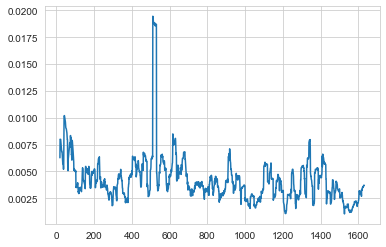

In [68]:
volList = eurt_price.price_usd.rolling(20).std(ddof=0)
volList.plot()